# Aula 02: Plotagem de Gráficos e Visualização de Dados

### Objetivo da Aula

- Aprofundar nos conceitos de visualização de dados usando Python.
- Aprender a criar diferentes tipos de gráficos (histogramas, box plots e gráficos de pizza) para extrair insights.
- Entender como agrupar e consolidar dados para uma análise mais clara.
- Desenvolver a capacidade de interpretar gráficos para tomar decisões financeiras informadas.

### Materiais Necessários

- Computador/Notebook com Python instalado
- Jupyter Notebook ou Google Colab
- Bibliotecas: Pandas, Matplotlib, Seaborn (`!pip install pandas matplotlib seaborn`)
- O dataset `EconomiasCasa.csv`

---

### Célula 1: Importação de Bibliotecas e Carregamento dos Dados

Nesta primeira célula, vamos importar as bibliotecas essenciais para nossa análise e carregar o arquivo CSV que contém os dados das despesas da casa.

* `pandas`: Fundamental para manipulação e análise de dados tabulares.
* `matplotlib.pyplot`: Usada para criar visualizações estáticas, interativas e animadas em Python.
* `seaborn`: Construída sobre o Matplotlib, oferece uma interface de alto nível para criar gráficos estatísticos atraentes e informativos.

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o conjunto de dados
df = pd.read_csv('EconomiasCasa.csv')

### Célula 2: Apresentação e Pré-processamento do Dataset

Antes de começarmos a plotar, é crucial entender a estrutura dos nossos dados. Vamos inspecionar as primeiras linhas do DataFrame e verificar os tipos de dados de cada coluna. Também realizaremos as etapas necessárias de limpeza para garantir que os dados estejam no formato correto para análise numérica e visualização.

In [42]:
# Exibir as primeiras linhas do DataFrame para entender sua estrutura
print("=== Primeiras Linhas do Dataset ===")
print(df.head())

# Exibir informações do DataFrame (tipos de dados, valores não nulos, etc.)
print("\n=== Informações Gerais e Tipos de Dados ===")
print(df.info())

# Converter a coluna 'Data' para o formato datetime
df['Data'] = pd.to_datetime(df['Data'])

# Limpar e converter a coluna 'Valor (R$)' para numérico
# Remove 'R$' prefix, replace '.' (thousands separator) with '', and ',' (decimal separator) with '.'
# Then convert to numeric
df['Valor (R$)'] = df['Valor (R$)'].astype(str).str.replace('R$', '', regex=False)
df['Valor (R$)'] = df['Valor (R$)'].str.replace('.', '', regex=False)
df['Valor (R$)'] = df['Valor (R$)'].str.replace(',', '.')
df['Valor (R$)'] = pd.to_numeric(df['Valor (R$)'])

# Definir 'Data' como índice para facilitar a análise e plotagem
df.set_index('Data', inplace=True)

# Exibir novamente as primeiras linhas e informações para confirmar as alterações
print("\n=== Primeiras Linhas do DataFrame Após Pré-processamento ===")
print(df.head())
print("\n=== Informações do DataFrame Após Pré-processamento ===")
print(df.info())

=== Primeiras Linhas do Dataset ===
         Data                         Descrição    Categoria  Valor (R$)
0  2025-01-01     Lanche de Ano Novo na padaria  Alimentação     R$45,50
1  2025-01-02    Compras de hortifruti na feira  Alimentação     R$75,20
2  2025-01-03   Corrida de Uber para o trabalho   Transporte     R$18,90
3  2025-01-04  Compras da semana - Supermercado  Alimentação    R$580,70
4  2025-01-05                 Aluguel - Janeiro      Moradia  R$2.200,00

=== Informações Gerais e Tipos de Dados ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Data        123 non-null    object
 1   Descrição   123 non-null    object
 2   Categoria   123 non-null    object
 3   Valor (R$)  123 non-null    object
dtypes: object(4)
memory usage: 4.0+ KB
None

=== Primeiras Linhas do DataFrame Após Pré-processamento ===
                              

### Célula 3: Visualizando a Distribuição dos Gastos (Histograma)

Um histograma é excelente para visualizar a distribuição de uma variável numérica. Ele nos mostra a frequência com que os diferentes valores de gastos ocorrem. A Curva de Estimativa de Densidade de Kernel (KDE) adicionada ajuda a suavizar a visualização da distribuição.

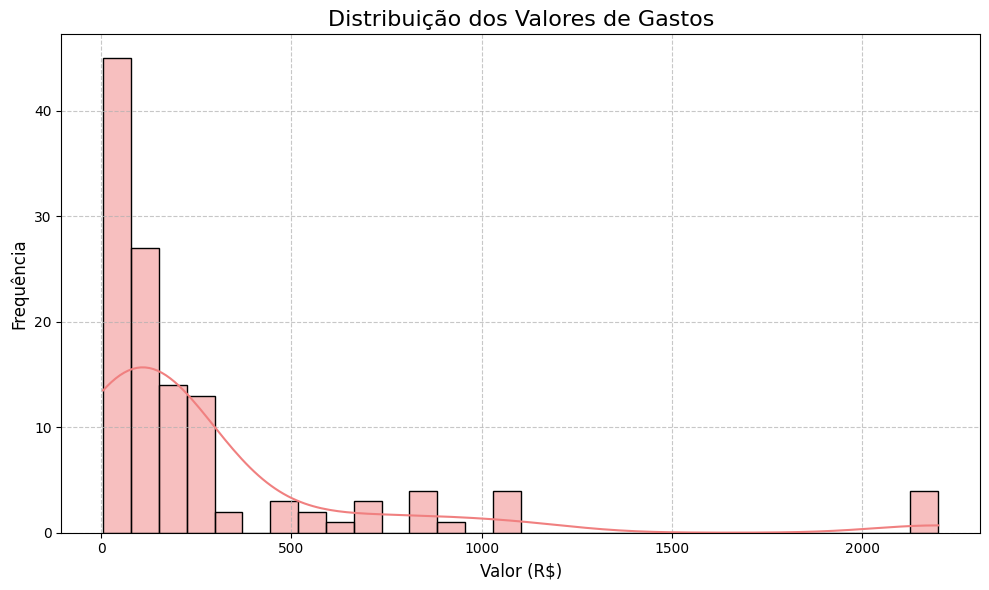

In [43]:
# Plotar a distribuição de 'Valor (R$)' usando um histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['Valor (R$)'], kde=True, bins=30, color='lightcoral') # Adicionar KDE e ajustar número de bins
plt.title('Distribuição dos Valores de Gastos', fontsize=16)
plt.xlabel('Valor (R$)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('distribuicao_valores_gastos.png')
plt.show() # Exibir o gráfico

### Célula 4: Análise da Dispersão com Box Plot

O Box Plot (Diagrama de Caixa) é uma ferramenta estatística poderosa para visualizar a distribuição de um conjunto de dados e identificar rapidamente a presença de *outliers*.

Ele exibe cinco medidas resumidas:
1.  **Mediana** (linha central da caixa): O valor que divide o conjunto de dados em duas metades iguais (50% dos dados estão abaixo e 50% acima).
2.  **Primeiro Quartil (Q1)** (base da caixa): 25% dos dados estão abaixo deste valor.
3.  **Terceiro Quartil (Q3)** (topo da caixa): 75% dos dados estão abaixo deste valor.
A altura da caixa representa o **Intervalo Interquartil (IQR = Q3 - Q1)**, que contém os 50% centrais dos dados.
Os "bigodes" (*whiskers*) se estendem do Q1 e Q3 até os valores mínimo e máximo dentro de 1.5 vezes o IQR.
Pontos fora dos bigodes são considerados "**outliers**" (valores atípicos), que são valores que se desviam significativamente da maioria dos dados.

Neste gráfico, o Box Plot dos 'Valores de Gastos' nos permite entender a centralidade, dispersão e a presença de gastos excepcionalmente altos ou baixos.

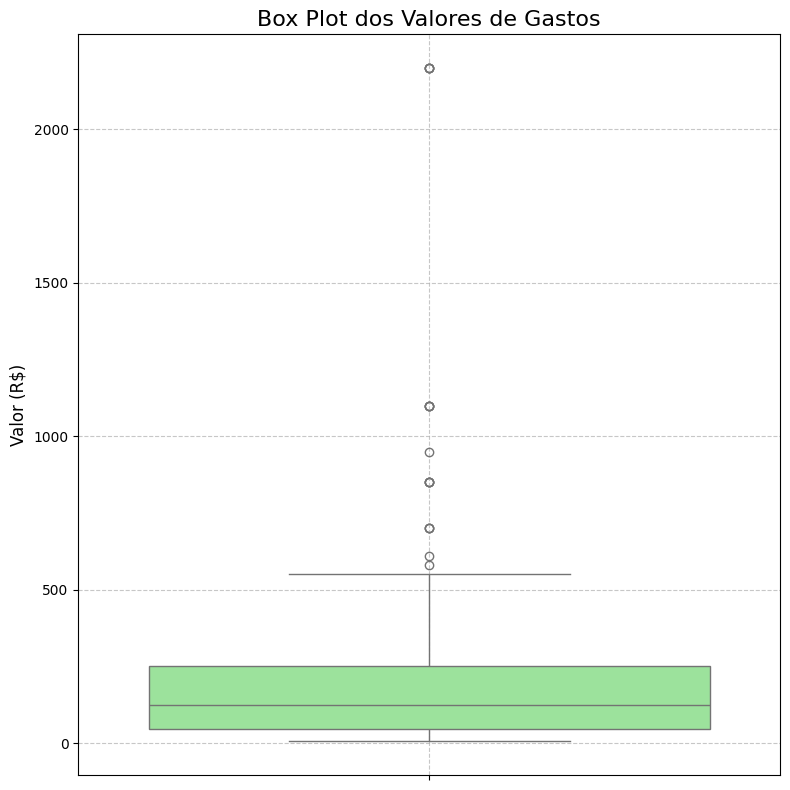

In [44]:
# Plotar um box plot para 'Valor (R$)' para visualizar quartis e outliers
plt.figure(figsize=(8, 8))
sns.boxplot(y=df['Valor (R$)'], color='lightgreen')
plt.title('Box Plot dos Valores de Gastos', fontsize=16)
plt.ylabel('Valor (R$)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('box_plot_valores_gastos.png')
plt.show() # Exibir o gráfico

### Célula 5: Proporção de Gastos por Categoria (Gráfico de Pizza Agrupado)

Para ter uma visão clara de como o orçamento está sendo distribuído, vamos criar um gráfico de pizza. Para melhorar a legibilidade e evitar muitos rótulos pequenos, vamos agrupar todas as categorias que representam menos de 7% do total de gastos em uma única fatia chamada "Outros".

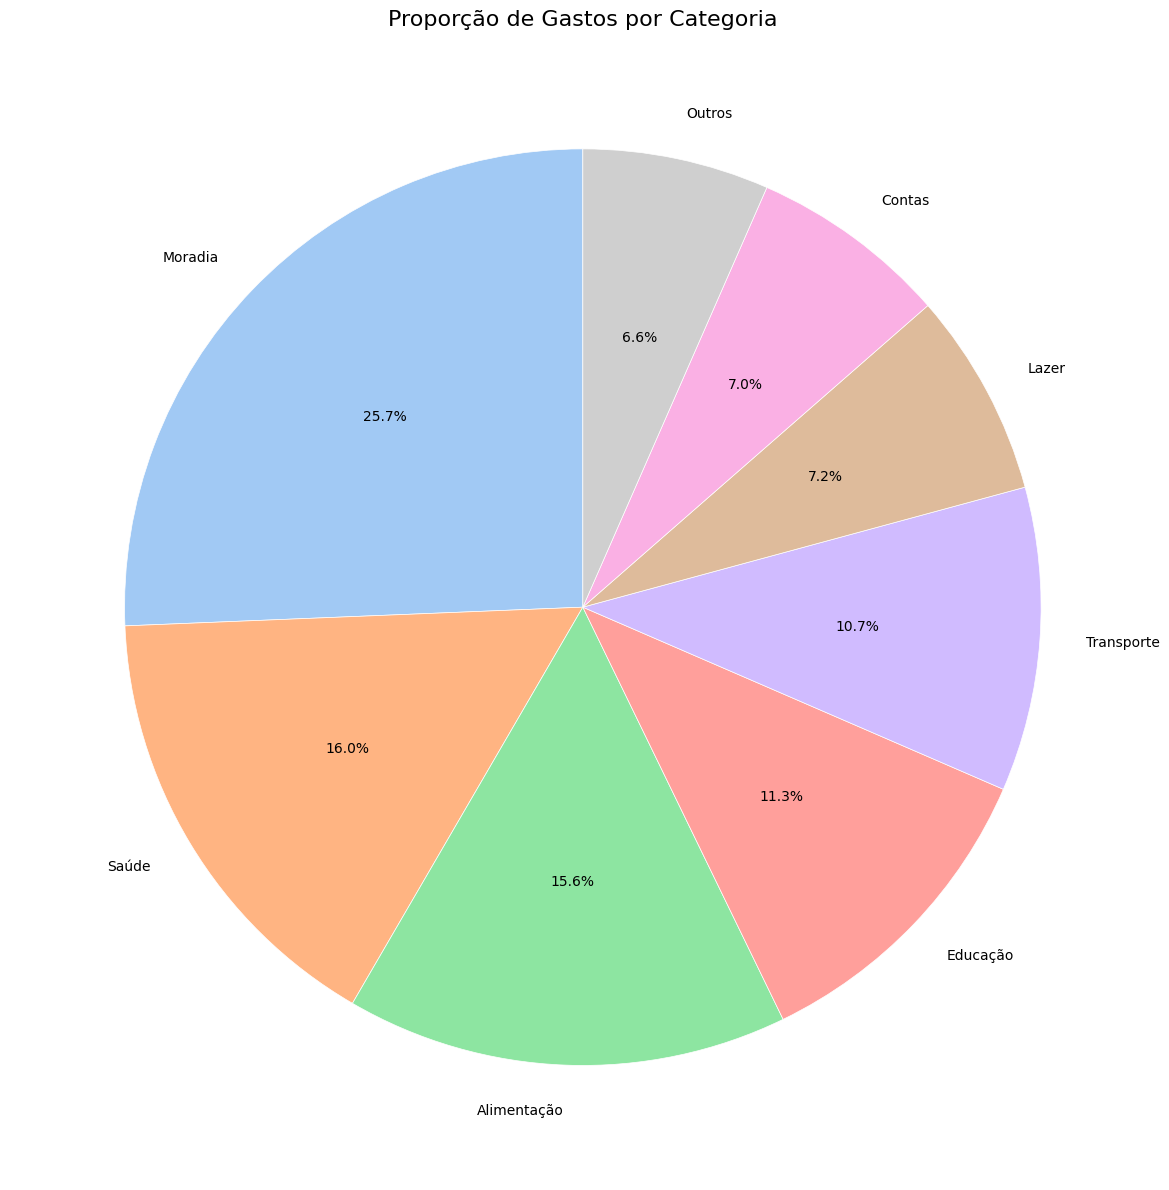

In [45]:
# Plotar os gastos por categoria com porcentagens (gráfico de proporções - pie chart)
if 'Categoria' in df.columns:
    # Agrupar por categoria e somar os valores
    gastos_por_categoria = df.groupby('Categoria')['Valor (R$)'].sum().sort_values(ascending=False)

    # Calcular as porcentagens
    porcentagens = gastos_por_categoria / gastos_por_categoria.sum() * 100

    # Agrupar categorias menores que o threshold em "Outros"
    threshold = 4.0
    outras_categorias = porcentagens[porcentagens < threshold]
    principais_categorias = porcentagens[porcentagens >= threshold]

    if not outras_categorias.empty:
        outros_soma = outras_categorias.sum()
        # Criação da categoria Outros para simplificar a visualização
        outros_series = pd.Series({'Outros': outros_soma})
        porcentagens_agrupadas = pd.concat([principais_categorias, outros_series]).sort_values(ascending=False)
    else:
        porcentagens_agrupadas = porcentagens.sort_values(ascending=False)

    plt.figure(figsize=(12, 12)) # Aumentar o tamanho da figura para dar mais espaço aos rótulos
    # autopct='%1.1f%%': formato das porcentagens com uma casa decimal
    # textprops={'fontsize': 10}: tamanho da fonte para os textos das porcentagens
    # wedgeprops={'edgecolor': 'black'}: bordas para as fatias para melhor distinção
    plt.pie(
        porcentagens_agrupadas, # Usar as porcentagens agrupadas
        labels=porcentagens_agrupadas.index,
        startangle=90,
        autopct='%1.1f%%',
        colors=sns.color_palette('pastel', len(porcentagens_agrupadas)),
        textprops={'fontsize': 10}, 
        wedgeprops={'edgecolor': 'white', 'linewidth': 0.5} 
    )
    plt.title('Proporção de Gastos por Categoria', fontsize=16)
    plt.tight_layout()
    plt.savefig('proporcao_gastos_por_categoria_agrupado.png') 
    plt.show() # Exibir o gráfico diretamente


### Célula 6: Gastos Totais por Categoria (Gráfico de Barras)

Enquanto o gráfico de pizza mostra a proporção, o gráfico de barras é excelente para comparar os valores absolutos de gastos entre as diferentes categorias. Ele nos dá uma visão clara das categorias onde mais dinheiro está sendo gasto.

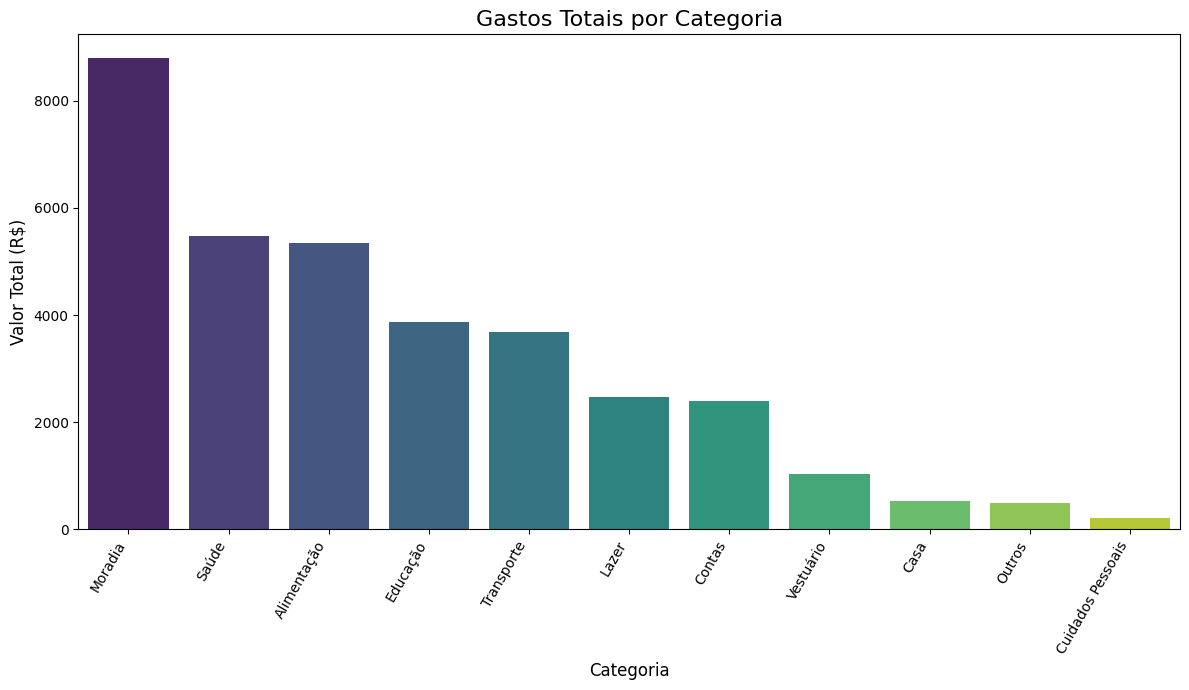

In [46]:
if 'Categoria' in df.columns:
    # Agrupar por categoria e somar os valores
    gastos_por_categoria = df.groupby('Categoria')['Valor (R$)'].sum().sort_values(ascending=False)
    plt.figure(figsize=(12, 7))
    sns.barplot(x=gastos_por_categoria.index, y=gastos_por_categoria.values, hue=gastos_por_categoria.index, palette='viridis', legend=False)
    plt.title('Gastos Totais por Categoria', fontsize=16)
    plt.xlabel('Categoria', fontsize=12)
    plt.ylabel('Valor Total (R$)', fontsize=12)
    plt.xticks(rotation=60, ha='right')
    plt.tight_layout()
    plt.savefig('gastos_por_categoria_bar.png')
    plt.show() # Exibir o gráfico

### Célula 7: Descobertas e Discussão

Agora que visualizamos os dados de diversas formas, podemos tirar algumas conclusões sobre os hábitos de gastos:

* **Identificação de Maiores Gastos:** O gráfico de pizza e o de barras nos ajudam a identificar rapidamente as categorias que consomem a maior parte do orçamento.
* **Distribuição dos Gastos:** Entendemos a proporção de cada categoria no orçamento total.
* **Análise de Outliers:** O box plot nos alertou sobre possíveis gastos atípicos que merecem uma investigação mais aprofundada.
* **Decisões Informadas:** Com essas visualizações, é possível tomar decisões mais informadas sobre onde cortar gastos ou otimizar o orçamento.

---

### Desafio

Agora é sua vez de ser analisar dados!

**Datasets Sugeridos:**
1.  Gorjetas em um Restaurante (Tips):
    ```python
    !pip install seaborn

    import seaborn as sns
    
    df_tips = sns.load_dataset('tips')
    print(df_tips.head())
    ```
2.  Filmes do IMDb: Procure por "IMDb movies dataset" no Kaggle.

**Missão:** Escolha um dos datasets e encontre 3 insights interessantes usando as métricas e ferramentas que aprendemos hoje. Crie seus próprios gráficos para apresentar suas descobertas!